## installing and importing libraries

In [1]:
import pandas as pd 
import mysql.connector as sql
#!pip install datasist
import datasist as ds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## creating sql connection and connecting to database

In [2]:
conn = sql.connect(host= 'localhost' , 
                   user='root',
                   passwd='root',
                   use_pure=True,
                  database='practice')
print(conn)

## read in file as dataframe

In [3]:
data = pd.read_sql_query('''SELECT * FROM practice.hospital_readmissions''', conn)

hsp_df = pd.DataFrame(data)
hsp_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_15528\2788039234.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('''SELECT * FROM practice.hospital_readmissions''', conn)


,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## Data Cleaning

In [4]:
#ds.structdata.describe(data_df)
#quick exploration of dataset
print(hsp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [5]:
#renaming some columns
hsp_df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)

#converting age column to categorical data
#checking for the unique values in the age column
print(hsp_df['age'].unique())

#creating a new column called age_cat
hsp_df['age_cat'] = hsp_df['age'].replace({'[70-80)':'senior-old age',
                                           '[50-60)':'late-middle age','[60-70)':'mid-old age',
                                           '[40-50)':'early-middle age','[80-90)':'very senior-old','[90-100)':'centenarians'})

print('\n')
#converting column type to categorical data type
hsp_df['age_cat'] = hsp_df['age_cat'].astype('category')
print('dtype :',hsp_df['age_cat'].dtype)

#viewing age and age_cat columns
#hsp_df[['age','age_cat']]

#drop age column
hsp_df.drop('age', axis=1, inplace=True)

#changing data type to the correct data type
# Columns to be converted to categorical datatype
cols_to_convert = ['medical_specialty', 'primary_diagnosis', 'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest', 'med_change', 'diabetes_med', 'readmitted']

# Convert columns to categorical datatype
hsp_df[cols_to_convert] = hsp_df[cols_to_convert].astype('category')
#checking data type
print(hsp_df.dtypes)


['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']


dtype : category
time_in_hospital          int64
n_lab_procedures          int64
n_procedures              int64
n_medications             int64
n_outpatient              int64
n_inpatient               int64
n_emergency               int64
medical_specialty      category
primary_diagnosis      category
sec_diagnosis          category
additional_sec_diag    category
glucose_test           category
HbA1ctest              category
med_change             category
diabetes_med           category
readmitted             category
age_cat                category
dtype: object


In [6]:
#checking for duplicates
print('duplicates :', hsp_df.duplicated().sum())

#viewing the unique values of each column to check for inconsistent data
cols = hsp_df.columns

for c in cols:
    print(c)
    print('\n',hsp_df[c].unique())

duplicates : 0
time_in_hospital

 [ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]
n_lab_procedures

 [ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]
n_procedures

 [1 2 0 6 3 5 4]
n_medications

 [18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]
n_outpatient

 [ 2  0  1  3  7  5  4  6  9  8 11 10 15 21 13 12 27 16 14 33 20 18 23]
n_inpatient

 [ 0  2  3  1  6  9  7  4  5  8 10 11 14 12 15 13]
n_emergency

 [ 0  1 10  2  3  4  5  7  6 12  8 

## Data Cleaning

The dataset contained 2500 rows and 17 columns, and these were what I did to the columns:
 - There were no missing or duplicates data in the dataframe.
 
 - The columns named diag_1 ,diag_2,diag_3,change,A1Ctest, were renamed as primary_diagnosis ,sec_diagnos ,additional_sec_diag ,med_change , HbA1ctest respectively

 - For the age column although the wrong categorization done already couldn't be corrected, the various age categories named as [70-80), [50-60),[60-70), [40-50), [80-90),[90-100), were renamed as senior-old age, late-middle age , mid-oldd-age, early-middle age, very senior-old,centenarians respectively. 

 
 - The data type of these rows (medical_specialty, primary_diagnosis , sec_diagnosis, additional_sec_diag, glucose_test, HbA1ctest, med_change, diabetes_med, readmitted)were converted to categorical data type
 

At the end there was 2500 rows and 17 columns .

## Exploratory Data Analysis

In [7]:
#using pd.describe to explore numeric columns
print(hsp_df.describe())

#describing the categorical columns
print(hsp_df.describe(exclude=[np.number]))

       time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
count       25000.00000       25000.00000  25000.000000   25000.000000   
mean            4.45332          43.24076      1.352360      16.252400   
std             3.00147          19.81862      1.715179       8.060532   
min             1.00000           1.00000      0.000000       1.000000   
25%             2.00000          31.00000      0.000000      11.000000   
50%             4.00000          44.00000      1.000000      15.000000   
75%             6.00000          57.00000      2.000000      20.000000   
max            14.00000         113.00000      6.000000      79.000000   

       n_outpatient   n_inpatient   n_emergency  
count  25000.000000  25000.000000  25000.000000  
mean       0.366400      0.615960      0.186600  
std        1.195478      1.177951      0.885873  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000

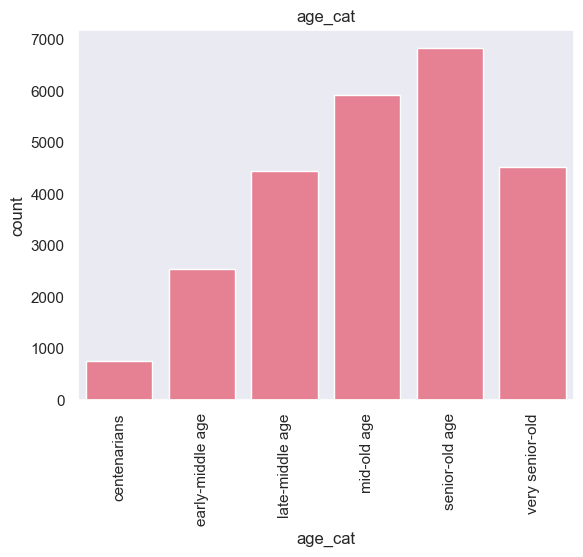

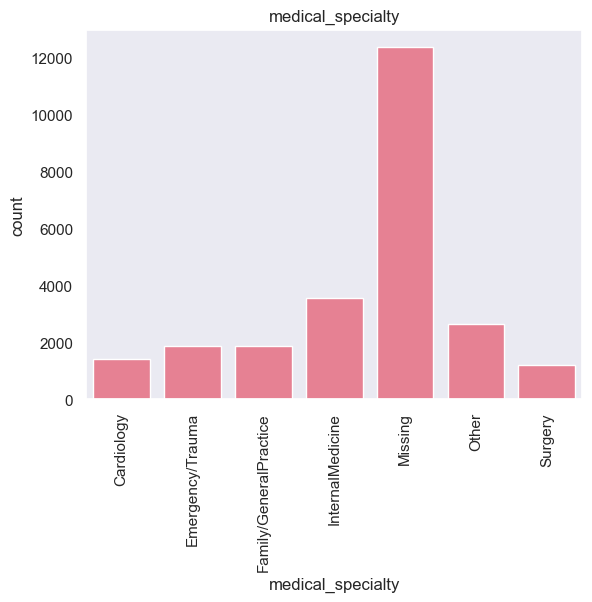

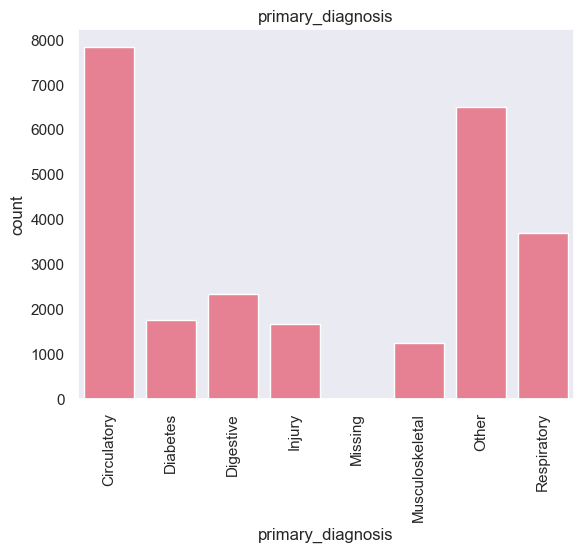

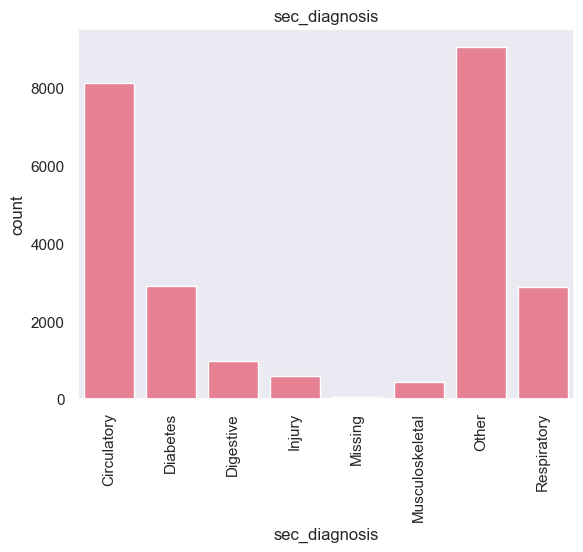

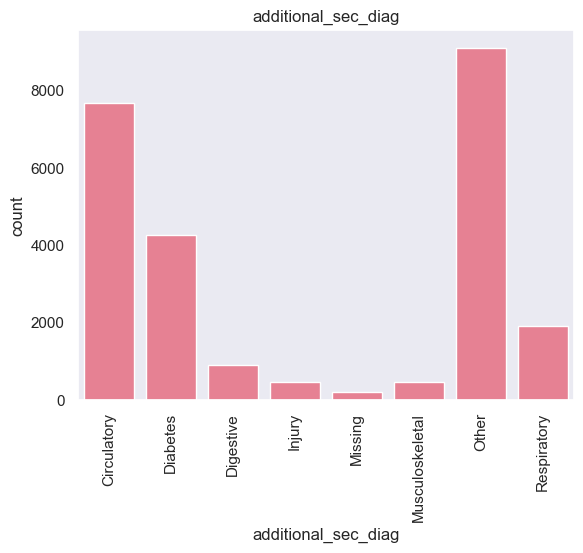

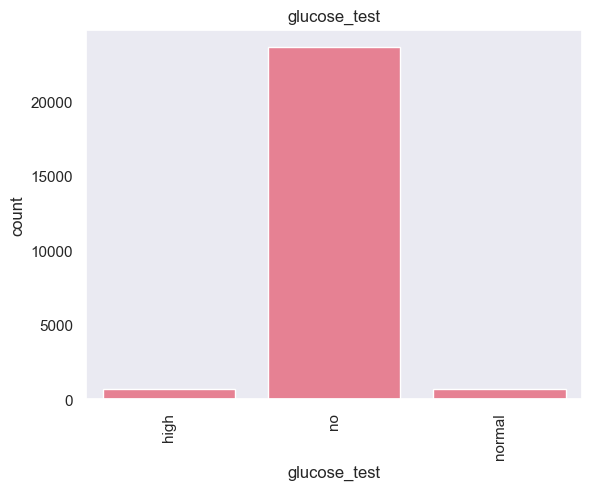

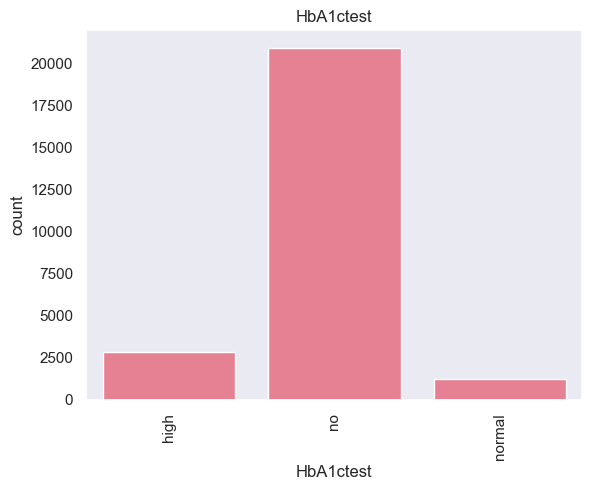

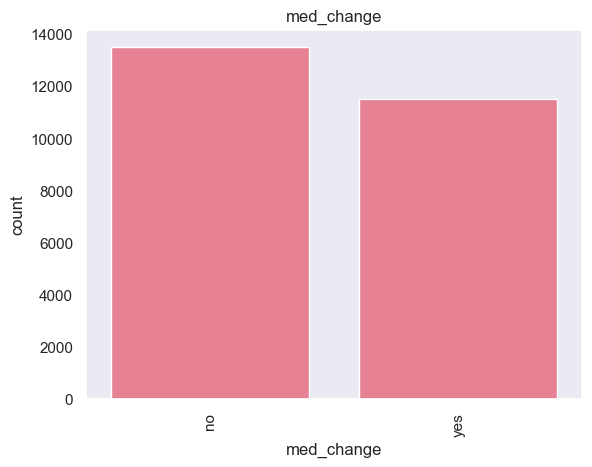

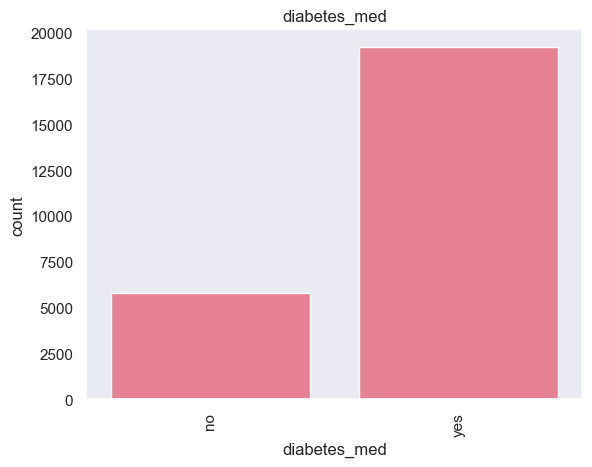

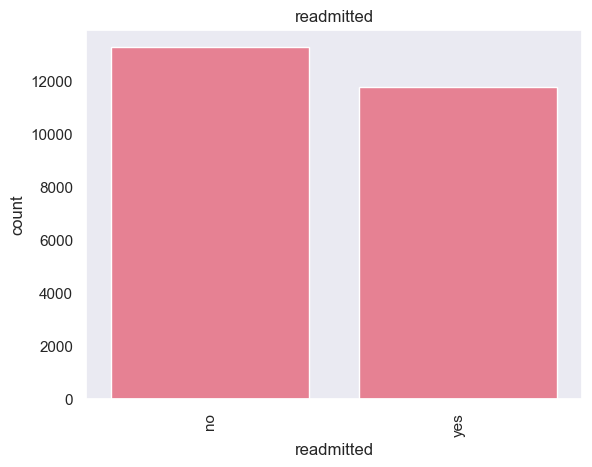

In [8]:
#visualize the information above for easy understanding
#value counting the categorical columns

columns = ['age_cat','medical_specialty','primary_diagnosis',
           'sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest','med_change','diabetes_med','readmitted']

sns.set(style='dark',font_scale=1)
sns.set_palette('husl',3)

def plot_cat_count():
    for c in columns:
        sns.countplot(x=c, data=hsp_df)
        plt.title(c)
        plt.xticks(rotation=90)
        plt.show()
        
plot_cat_count()

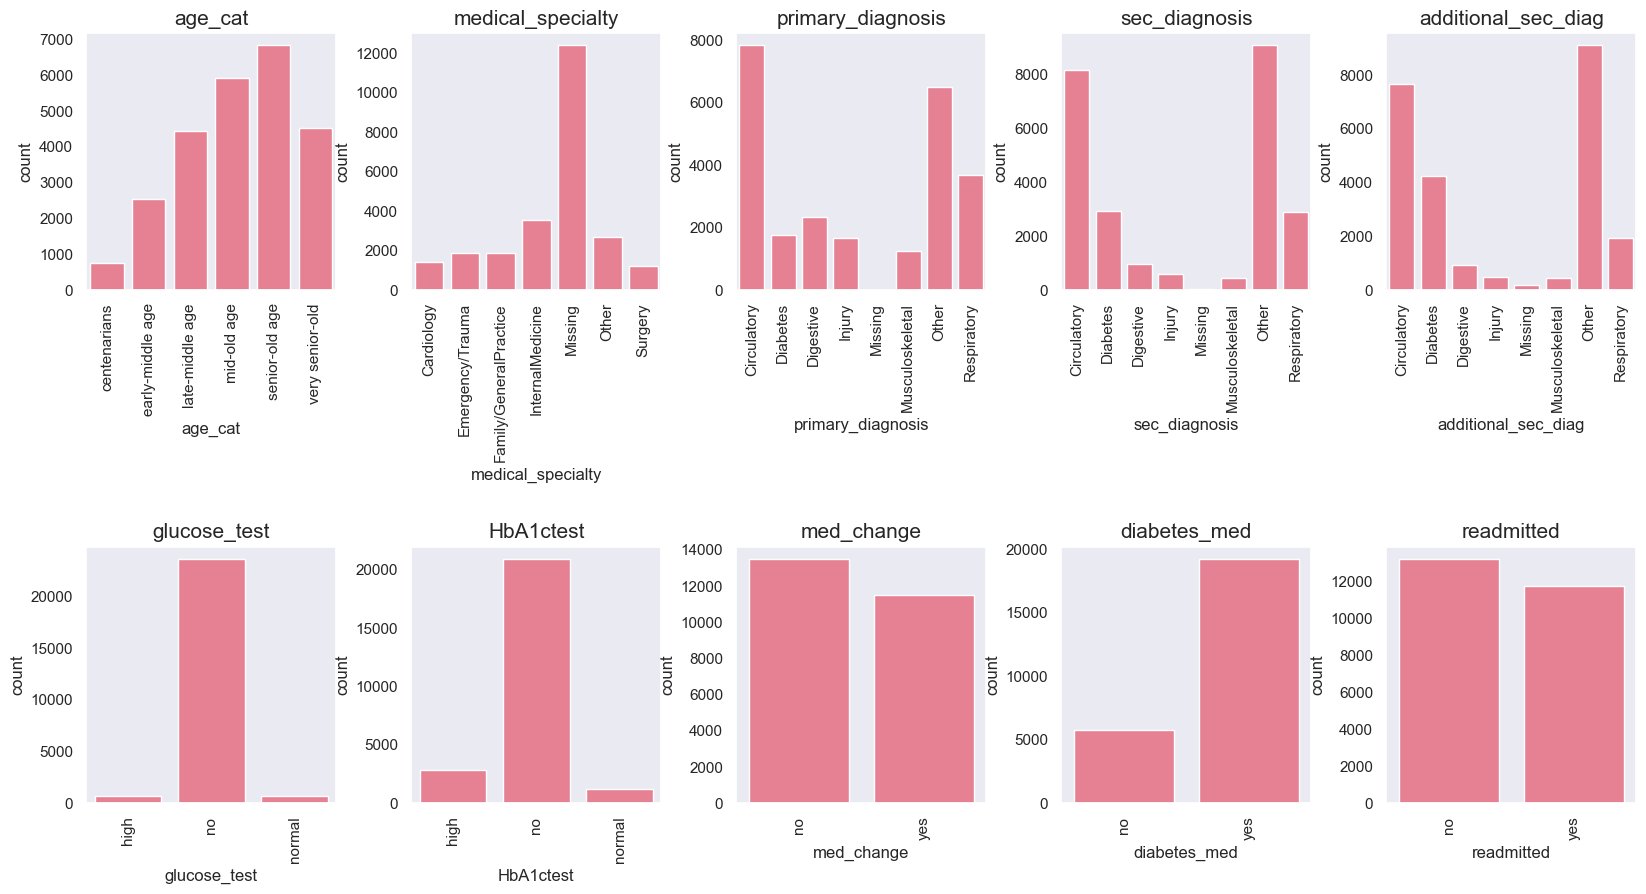

In [9]:
import warnings
warnings.filterwarnings("ignore")

#visualize the information above for easy understanding
#value counting the categorical columns

cols = ['age_cat','medical_specialty','primary_diagnosis',
           'sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest','med_change','diabetes_med','readmitted']

# plot data distribution
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.flatten()
#sns.set_style('white')
#sns.set_palette("PuRd")

for i, var in enumerate(cols):
    sns.countplot(x=var, ax=axs[i], data=hsp_df)
    axs[i].set_title(var, fontsize=15)
    axs[i].tick_params(axis='x', labelrotation=90)
    
plt.subplots_adjust(hspace=1.0, wspace=0.3)
plt.show()


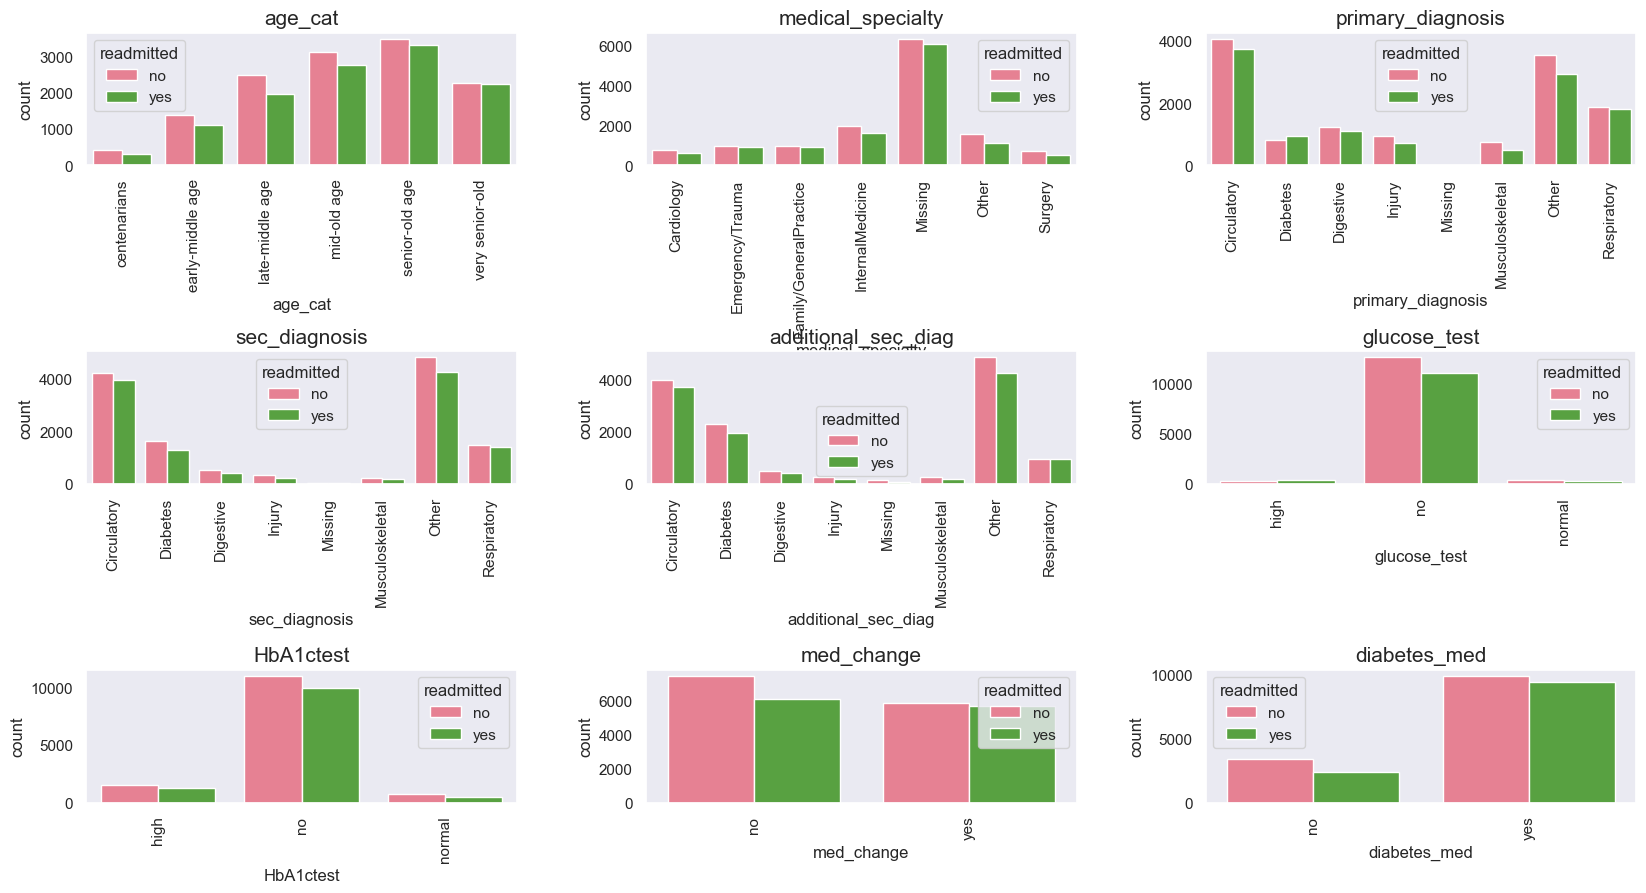

In [10]:
#visualize the information above for easy understanding
#value counting the categorical columns

cols = ['age_cat','medical_specialty','primary_diagnosis',
           'sec_diagnosis','additional_sec_diag','glucose_test','HbA1ctest','med_change','diabetes_med']

# plot data distribution
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
axs = axs.flatten()
#sns.set_style('white')
#sns.set_palette("PuRd")

for i, var in enumerate(cols):
    sns.countplot(x=var, ax=axs[i], data=hsp_df, hue='readmitted')
    axs[i].set_title(var, fontsize=15)
    axs[i].tick_params(axis='x', labelrotation=90)
    
plt.subplots_adjust(hspace=1.4, wspace=0.3)
plt.show()


In [11]:
#using groupby and value_counts to gain insights
df = hsp_df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True,sort=True).to_frame().unstack()
df

proportion                                          \
primary_diagnosis Circulatory  Diabetes Digestive    Injury   Missing   
age_cat                                                                 
centenarians         0.304000  0.045333  0.100000  0.088000  0.000000   
early-middle age     0.199052  0.145735  0.107030  0.063981  0.000000   
late-middle age      0.282120  0.088275  0.099281  0.061321  0.000000   
mid-old age          0.331811  0.065111  0.093692  0.067648  0.000169   
senior-old age       0.349861  0.056311  0.085564  0.064941  0.000146   
very senior-old      0.328167  0.040080  0.089017  0.071081  0.000443   

                                                         
primary_diagnosis Musculoskeletal     Other Respiratory  
age_cat                                                  
centenarians             0.010667  0.293333    0.158667  
early-middle age         0.039494  0.296209    0.148499  
late-middle age          0.051662  0.261456    0.155885  
mid-old age              0.063081  0.237105    0.141383  
senior-old age           0.054556  0.247623    0.140998  
very senior-old          0.037201  0.281001    0.153012

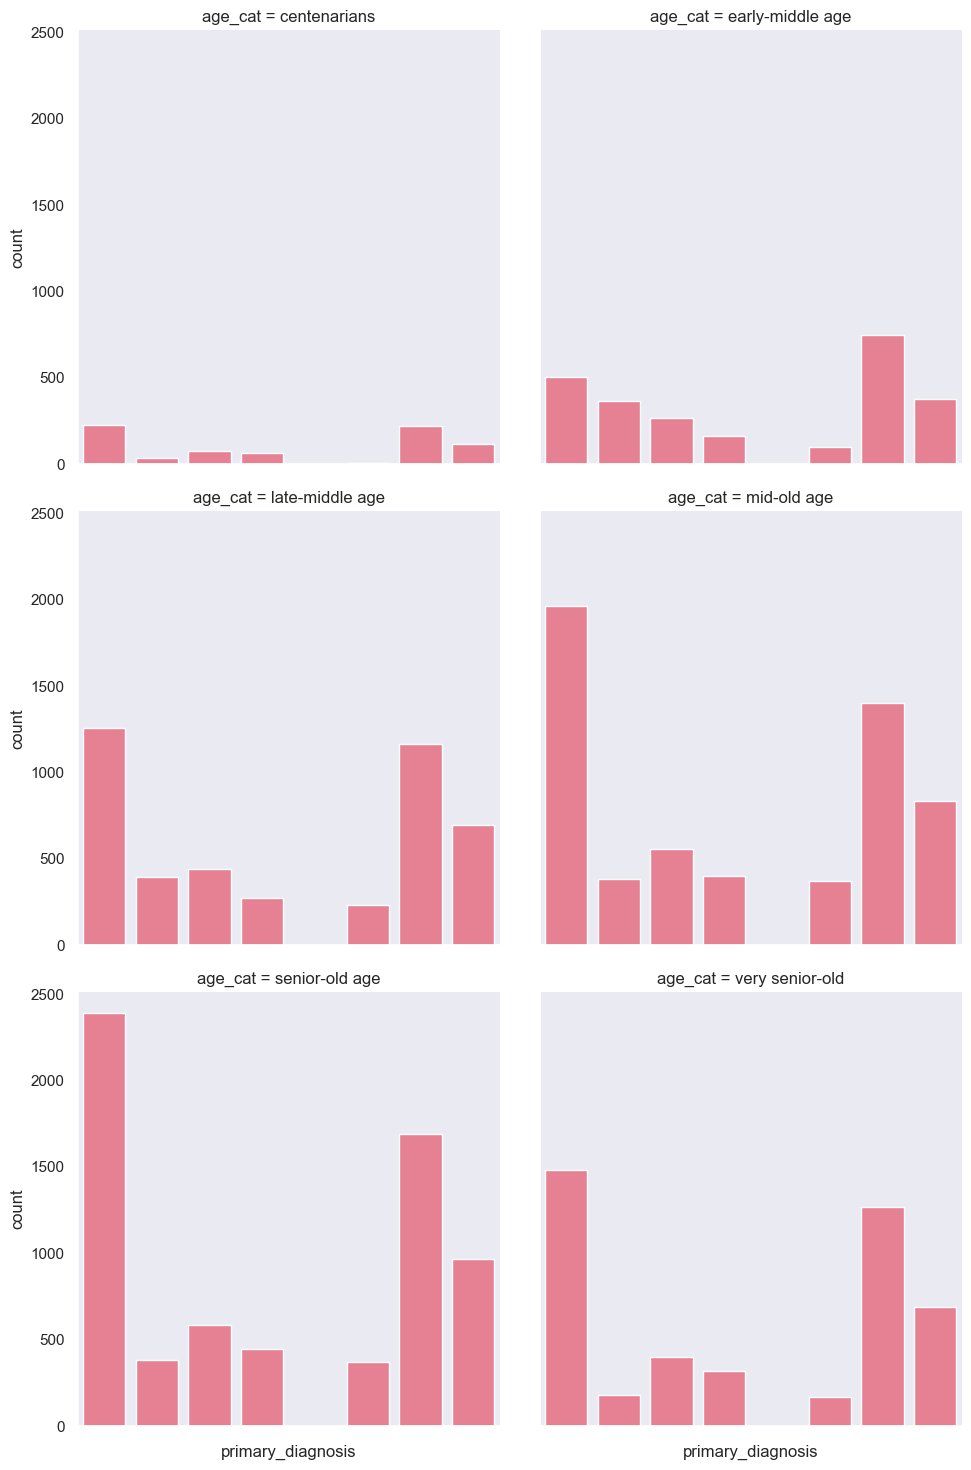

In [12]:
#countplot showing the most common primary diagnosis for each age category
g = sns.catplot(x='primary_diagnosis',col='age_cat', kind='count', data=hsp_df, col_wrap=2)
g.set_xticklabels(rotation=90)
plt.show()

From the table and graph above we can see that Circulatory diagnosis was the most common primary diagnosis across the varoius categories of age outside early middle age where Others as a diagnosis cateory came first and circulatory diagnosis second.

## Explore the effect of a diabetes diagnosis on readmission rates. 

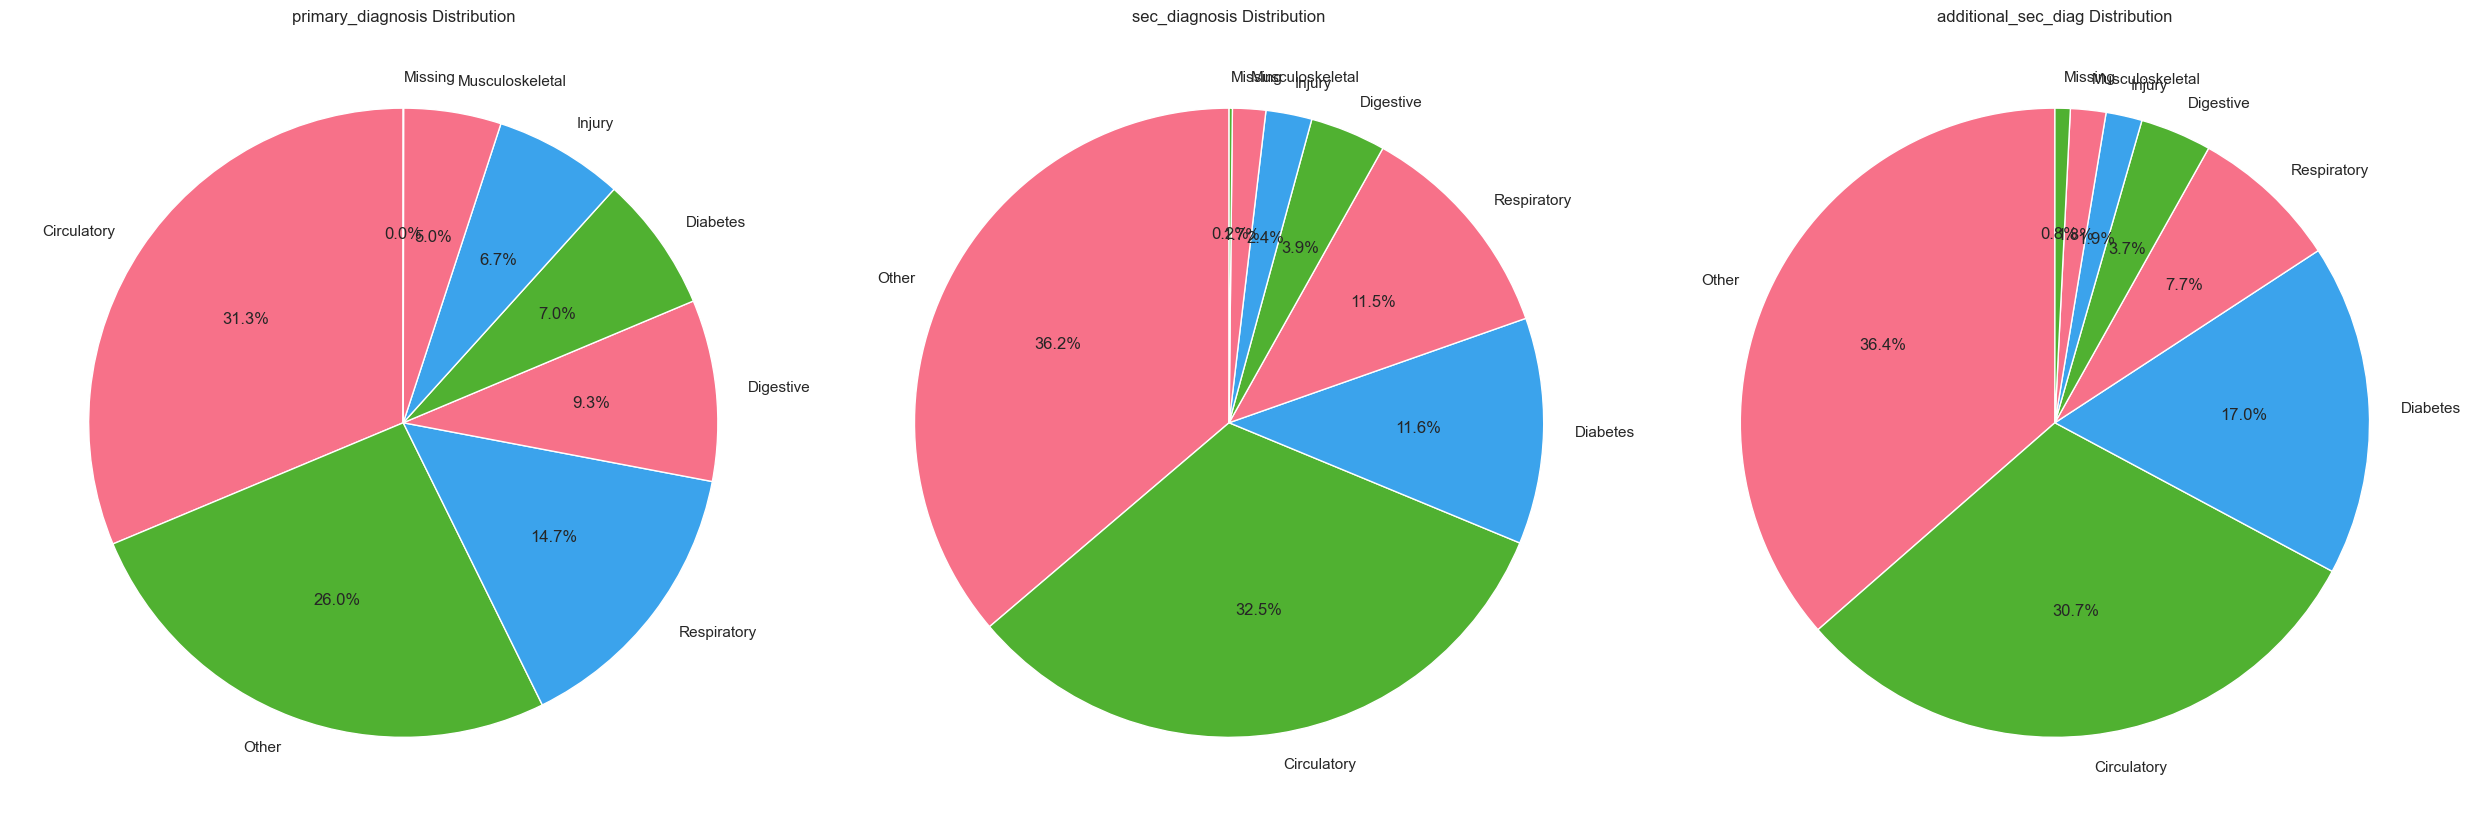

In [13]:
#distribution health conditions for the various diagnosis 

cat_vars = ['primary_diagnosis','sec_diagnosis','additional_sec_diag']

fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(25,20))

for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        cat_counts = hsp_df[var].value_counts()
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')
        
fig.tight_layout()
plt.subplots_adjust(hspace=1.4, wspace=0.05)
plt.show()

In [14]:
#subsetting for patient with DM diagnosis
diabetes_pt = hsp_df[(hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes')]
diabetes_pt.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
3,2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,senior-old age
12,8,67,0,21,0,0,0,Other,Diabetes,Circulatory,Other,no,normal,no,yes,no,senior-old age
14,2,73,1,26,0,0,0,InternalMedicine,Circulatory,Other,Diabetes,no,no,no,yes,no,very senior-old
16,3,52,0,10,0,0,0,Other,Circulatory,Other,Diabetes,no,no,no,yes,yes,senior-old age
18,7,72,0,13,0,0,0,InternalMedicine,Diabetes,Other,Other,no,high,no,yes,yes,early-middle age


In [15]:
#subsetting patient with non-DM diagnosis
non_diabetes_pt = hsp_df[~((hsp_df['primary_diagnosis'] == 'Diabetes') | (hsp_df['sec_diagnosis'] == 'Diabetes') |
       (hsp_df['additional_sec_diag'] == 'Diabetes'))]

#numbers of non-DM patient
print('number of non-DM patient: ',len(non_diabetes_pt.index))

#numbers of DM patient
print('number of DM patient: ',len(diabetes_pt.index))

number of non-DM patient:  16212
number of DM patient:  8788


In [16]:
#value counts of DM patients readmitted
diabetes_pt['readmitted'].value_counts(normalize=True)

readmitted
no     0.534706
yes    0.465294
Name: proportion, dtype: float64

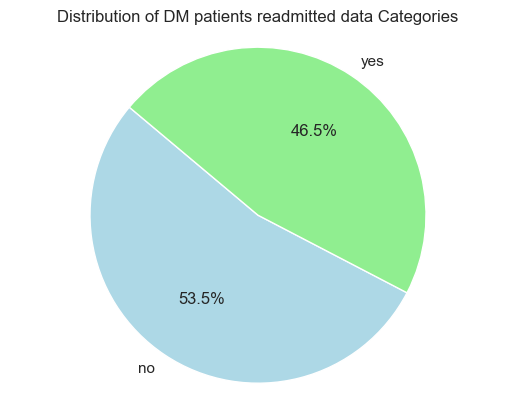

In [17]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.534706,
    'yes'   : 0.465294
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['lightblue', 'lightgreen']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of DM patients readmitted data Categories')

# Show the pie chart
plt.show()

In [18]:
#value counts of non-DM patients readmitted
non_diabetes_pt['readmitted'].value_counts(normalize=True)

readmitted
no     0.527202
yes    0.472798
Name: proportion, dtype: float64

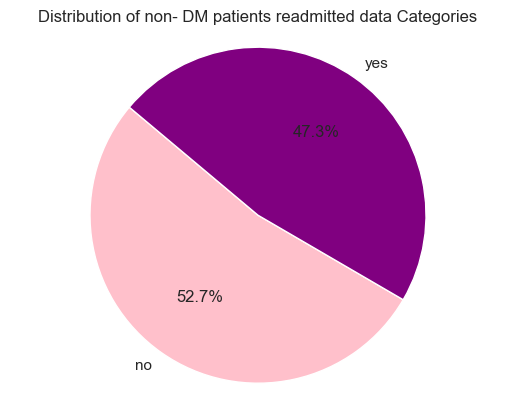

In [19]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.527202,
    'yes'   : 0.472798
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['pink', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of non- DM patients readmitted data Categories')

# Show the pie chart
plt.show()

In [20]:
#table showing the count of readmitted patient for each diagnosis
pd.set_option('display.max_rows', 64)
hsp_df.groupby(['primary_diagnosis','sec_diagnosis','additional_sec_diag'])['readmitted'].count().to_frame().unstack()

readmitted                            \
additional_sec_diag               Circulatory Diabetes Digestive Injury   
primary_diagnosis sec_diagnosis                                           
Circulatory       Circulatory            1724      877        48     66   
                  Diabetes                394       28        12      8   
                  Digestive                26        6        10      0   
                  Injury                   70       21         3     14   
                  Missing                   3        0         0      0   
                  Musculoskeletal           9       11         2      1   
                  Other                   595      381        35     18   
                  Respiratory             378      145        16     15   
Diabetes          Circulatory             133       10        13      6   
                  Diabetes                  2        1         2      0   
                  Digestive                13        2        13      2   
                  Injury                    4        0         1      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          18        0         0      2   
                  Other                   237       25        46     11   
                  Respiratory              35        1         3      1   
Digestive         Circulatory             121       85        39      4   
                  Diabetes                 99        3        38      1   
                  Digestive                60       92        81      3   
                  Injury                    8        3         7      1   
                  Missing                   0        1         0      0   
                  Musculoskeletal           3        4         2      0   
                  Other                   206      174       129     13   
                  Respiratory              56       26        21      2   
Injury            Circulatory             118       74         1     16   
                  Diabetes                 62        5         2      6   
                  Digestive                10       10         6      2   
                  Injury                   36       17         2     27   
                  Missing                   0        5         0      0   
                  Musculoskeletal           6        8         1      2   
                  Other                   172      133        13     51   
                  Respiratory              23        7         2      8   
Missing           Circulatory               0        0         0      0   
                  Diabetes                  1        0         0      0   
                  Digestive                 0        0         0      0   
                  Injury                    0        0         0      0   
                  Missing                   0        0         0      0   
                  Musculoskeletal           0        0         0      0   
                  Other                     0        1         0      0   
                  Respiratory               0        0         0      0   
Musculoskeletal   Circulatory              71      128         5      6   
                  Diabetes                122        5         2      1   
                  Digestive                 7        4         3      2   
                  Injury                    4        5         5      2   
                  Missing                   0        0         0      0   
                  Musculoskeletal          22       48         0      4   
                  Other                    95      110         7     13   
                  Respiratory              28       20         0      4   
Other             Circulatory             347      280        34     16   
                  Diabetes                288       17        30     15   
                  Digestive                50       54      

After exploring the data I could deduct that about 8788 patients had Diabetes as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis. This made up about one-third of the patients population.Amongst the DM patient approximately 47 percent were readmitted while 53 percent where not. While about 16212 patients did not have DM as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis.This makes about two-third of the patients population.Amongst the non-DM patients approximately 47 percent were readmitted while 53 percent were not. From the analysis we cannot really say if diabetes plays a central role in readmission as they could be other factors causing patients readmission but we can deduct that majority of the patients had diabetes as a diagnosis logically making them occupy a high readmission rates

## what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

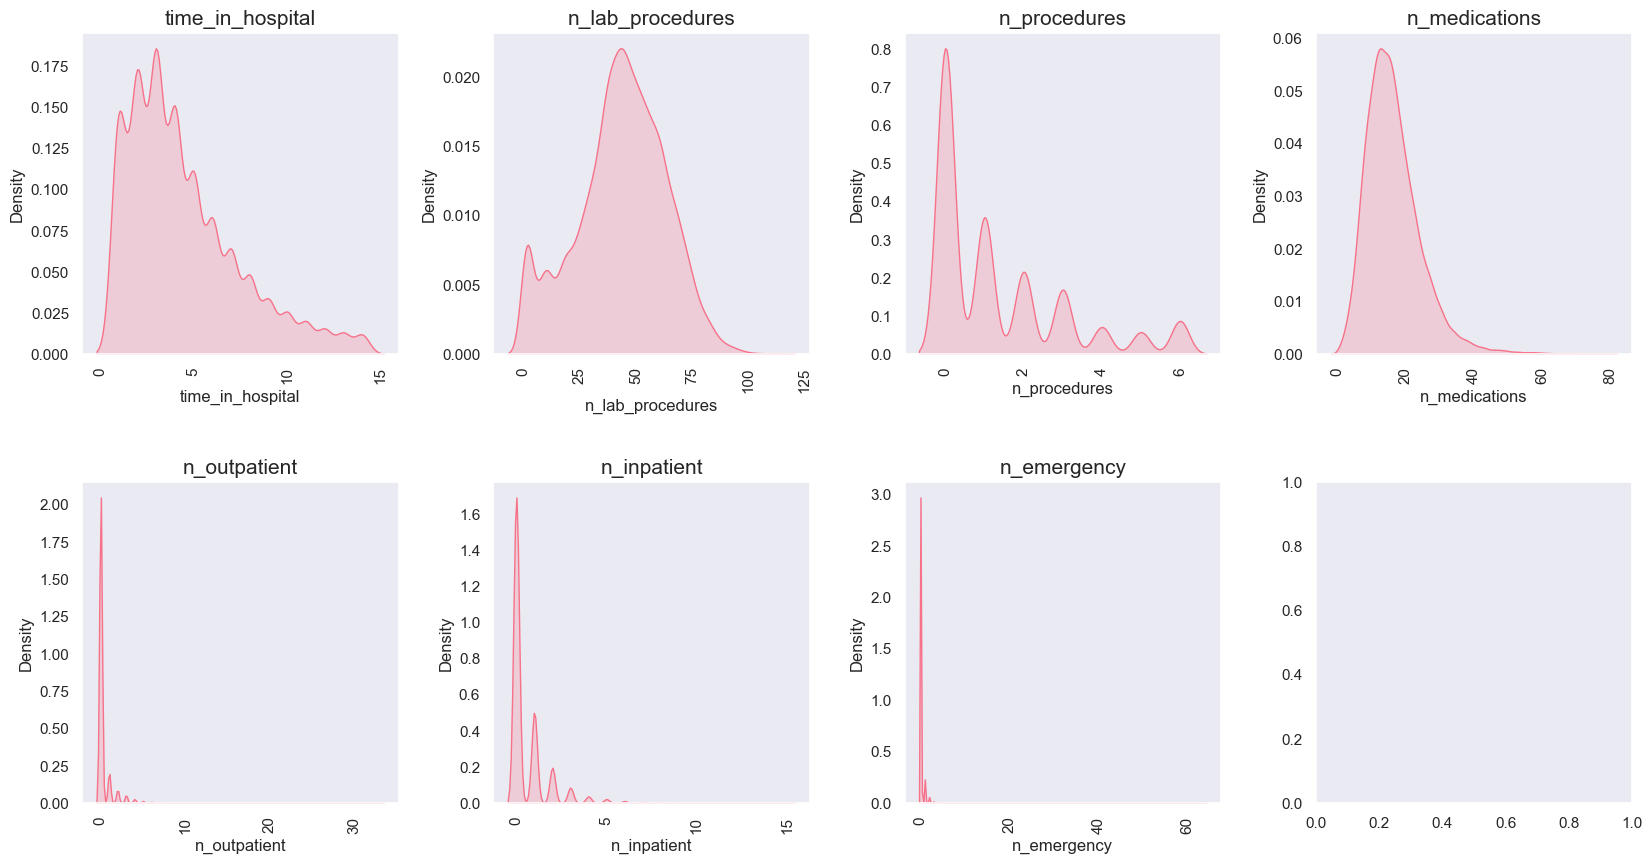

In [21]:
#visualize the information above for easy understanding
#value counting the categorical columns

cols = ['time_in_hospital','n_lab_procedures','n_procedures','n_medications','n_outpatient','n_inpatient','n_emergency']

# plot data distribution
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()
for i, var in enumerate(cols):
    sns.kdeplot(x=var, ax=axs[i], data=hsp_df,fill=True)
    axs[i].set_title(var, fontsize=15)
    axs[i].tick_params(axis='x', labelrotation=90)
    
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

### Data Visualization summary:
From the graphs above, there are no significant factor that could show what group of patient were more likely to be readmitted as their distribution and patterns were alike across all categories of readmitted status.

However, we can notice the heatmap shows a weak correlation between n_inpatient and readmitted

## Feature Engineering

In [22]:
hsp_df = hsp_df.drop(['medical_specialty'], axis=1)
#hsp_df.head(2)

In [23]:
hsp_df.columns

Index(['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency', 'primary_diagnosis',
       'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest',
       'med_change', 'diabetes_med', 'readmitted', 'age_cat'],
      dtype='object')

In [24]:
hsp_df = hsp_df[['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
       'n_outpatient', 'n_inpatient', 'n_emergency', 'primary_diagnosis',
       'sec_diagnosis', 'additional_sec_diag', 'glucose_test', 'HbA1ctest',
       'med_change', 'diabetes_med','age_cat', 'readmitted']]

In [25]:
hsp_df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,age_cat,readmitted
0,8,72,1,18,2,0,0,Circulatory,Respiratory,Other,no,no,no,yes,senior-old age,no
1,3,34,2,13,0,0,0,Other,Other,Other,no,no,no,yes,senior-old age,no
2,5,45,0,18,0,0,0,Circulatory,Circulatory,Circulatory,no,no,yes,yes,late-middle age,yes
3,2,36,0,12,1,0,0,Circulatory,Other,Diabetes,no,no,yes,yes,senior-old age,yes
4,1,42,0,7,0,0,0,Other,Circulatory,Respiratory,no,no,no,yes,mid-old age,no


In [26]:
hsp_df = pd.get_dummies(hsp_df, drop_first=True)

In [27]:
#hsp_df= hsp_df
hsp_df.dtypes

time_in_hospital                       int64
n_lab_procedures                       int64
n_procedures                           int64
n_medications                          int64
n_outpatient                           int64
n_inpatient                            int64
n_emergency                            int64
primary_diagnosis_Diabetes              bool
primary_diagnosis_Digestive             bool
primary_diagnosis_Injury                bool
primary_diagnosis_Missing               bool
primary_diagnosis_Musculoskeletal       bool
primary_diagnosis_Other                 bool
primary_diagnosis_Respiratory           bool
sec_diagnosis_Diabetes                  bool
sec_diagnosis_Digestive                 bool
sec_diagnosis_Injury                    bool
sec_diagnosis_Missing                   bool
sec_diagnosis_Musculoskeletal           bool
sec_diagnosis_Other                     bool
sec_diagnosis_Respiratory               bool
additional_sec_diag_Diabetes            bool
additional

In [28]:
df = hsp_df.corr()
df[['readmitted_yes']].sort_values(by='readmitted_yes', ascending=False)

,readmitted_yes
readmitted_yes,1.000000
n_inpatient,0.212480
n_outpatient,0.095487
n_emergency,0.093519
diabetes_med_yes,0.062145
med_change_yes,0.043214
time_in_hospital,0.043141
n_medications,0.036871
primary_diagnosis_Diabetes,0.036349
n_lab_procedures,0.032970


<Axes: >

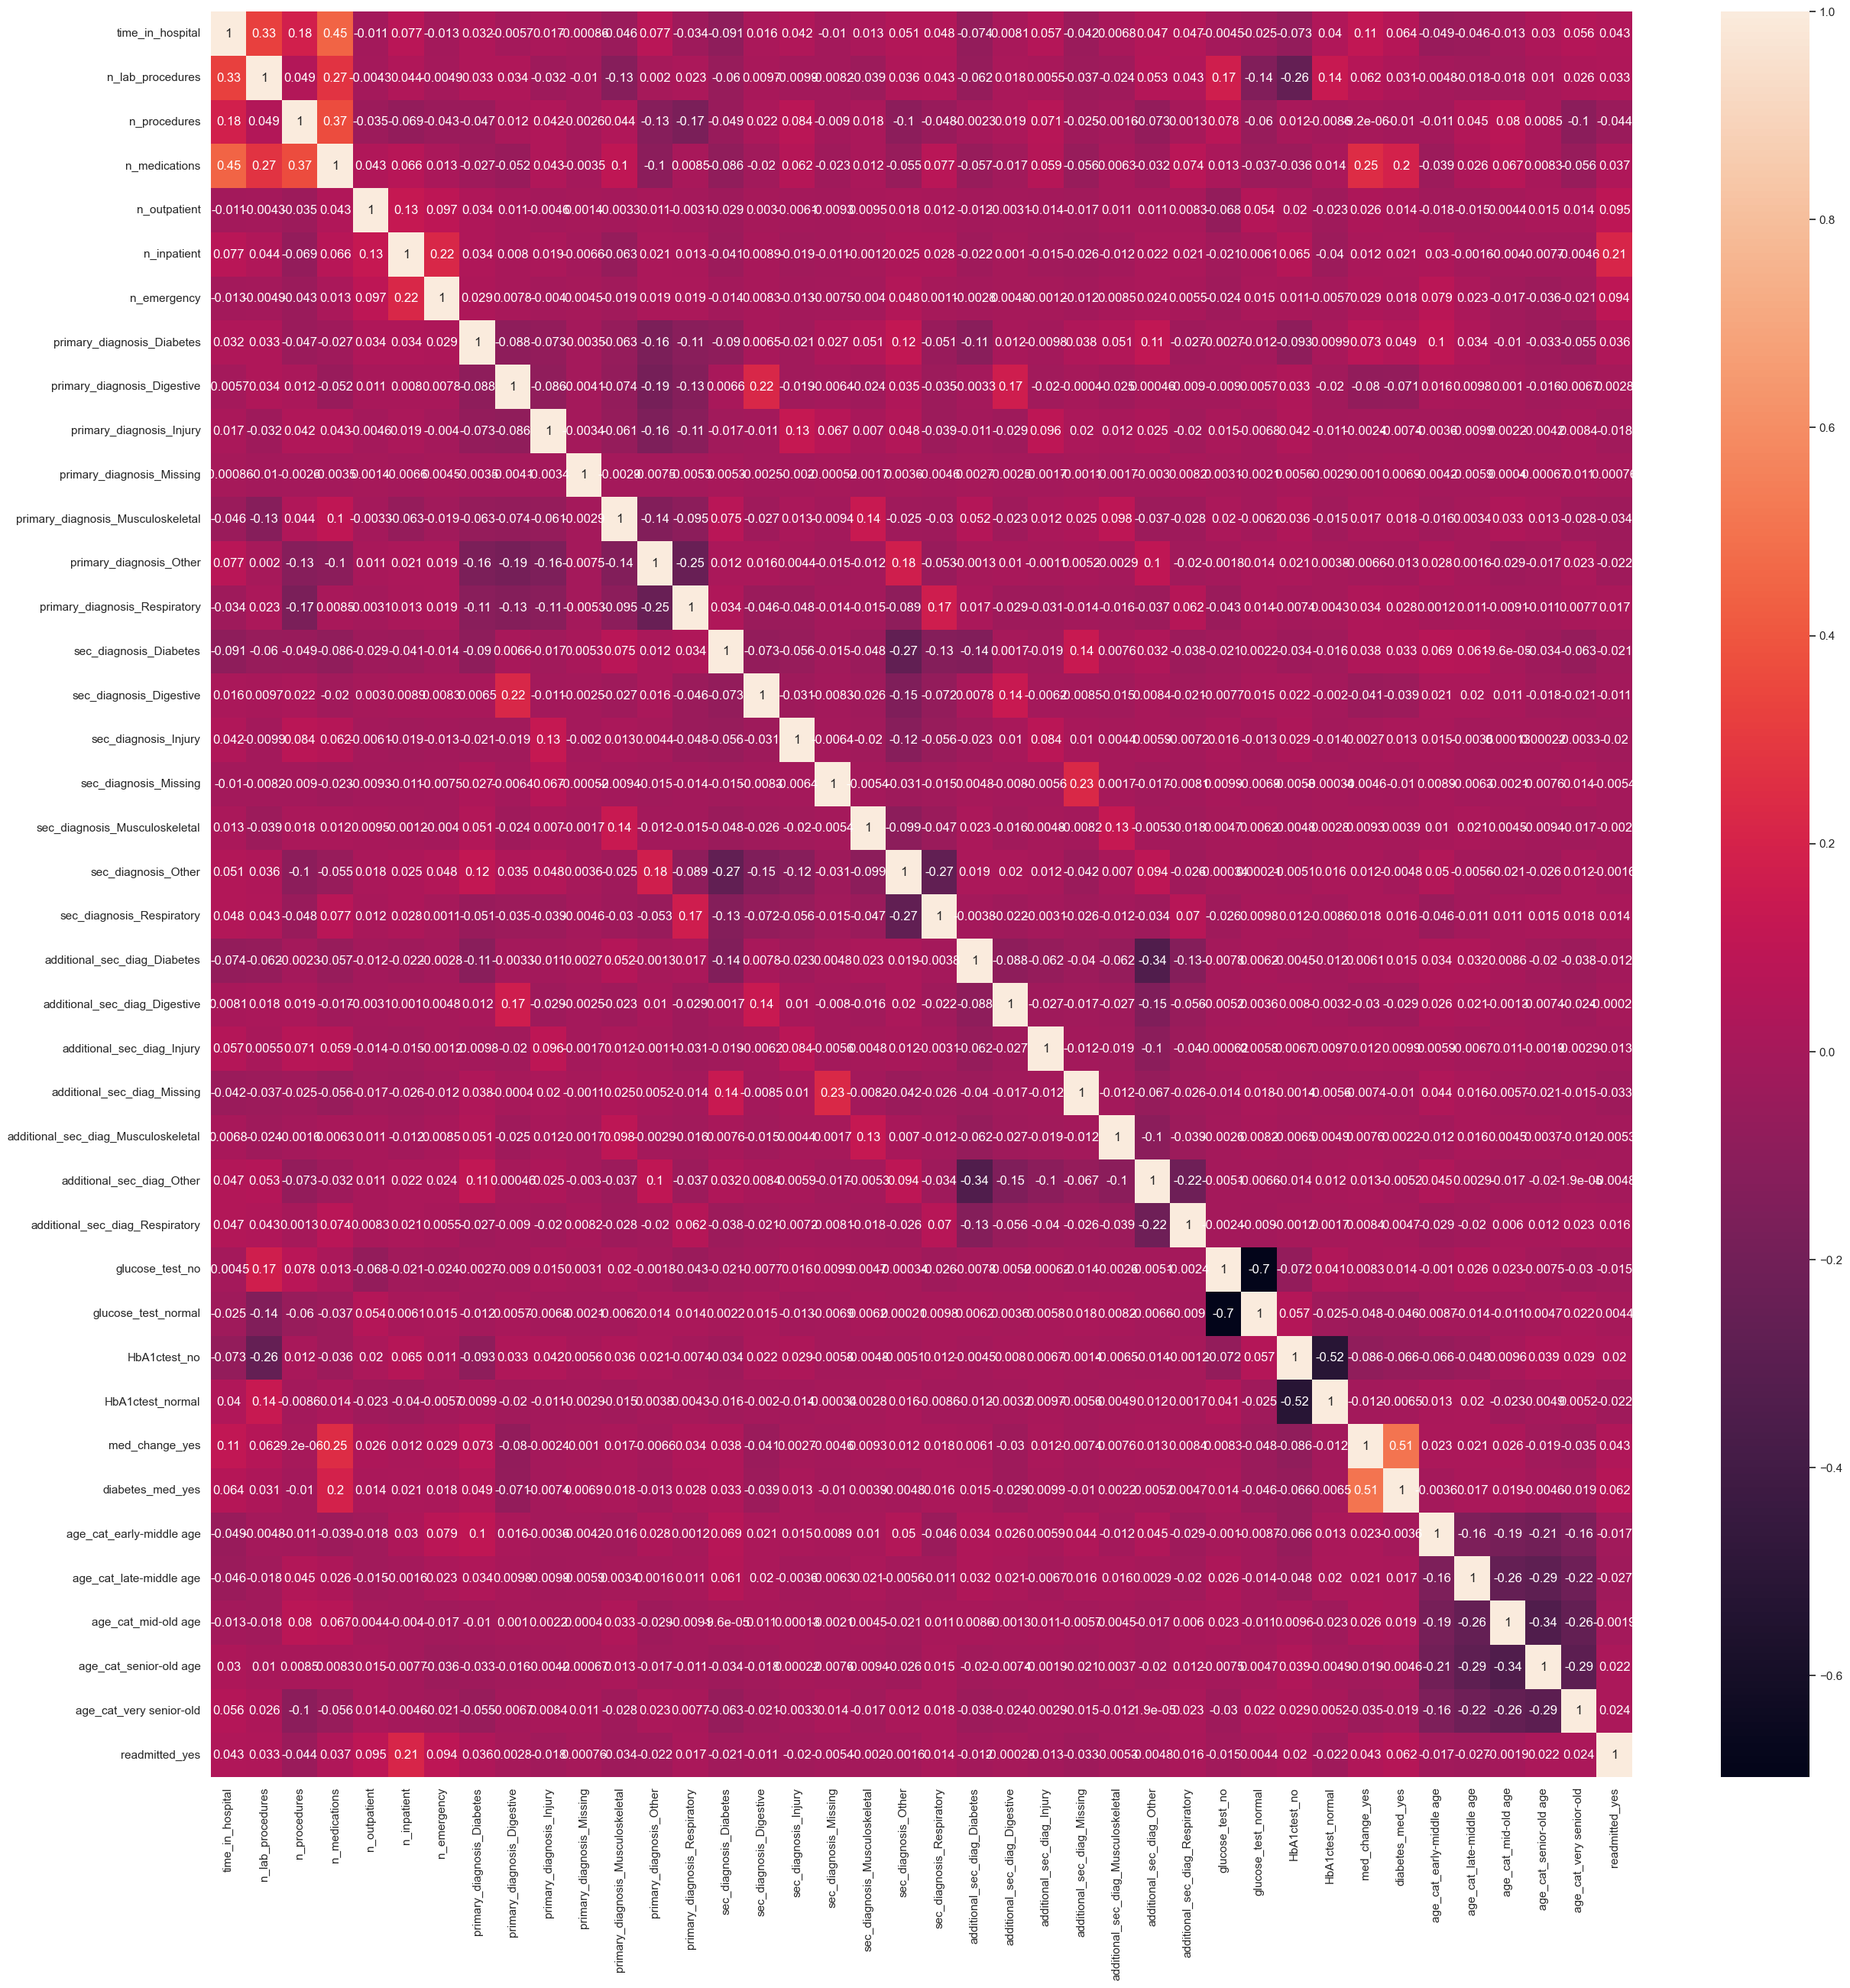

In [29]:
plt.rcParams['figure.figsize'] = [30,30]
sns.heatmap(hsp_df.corr(), annot=True)

## Modelling

In [30]:
#preprocessing categorical columns using pd get dummies
#dropping medical_specialty and 'readmitted'
X = hsp_df.drop(['readmitted_yes'], axis=1)
X = X.values

y = hsp_df['readmitted_yes'].values

print('X shape:', X.shape)

print('y shape:', y.shape)

X shape: (25000, 39)
y shape: (25000,)


In [31]:
#checking if the data is balance
hsp_df['readmitted_yes'].value_counts()

readmitted_yes
False    13246
True     11754
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score

In [33]:
#train test split features and target varibales
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=23)

In [34]:
# define the model
#rfc = RandomForestClassifier()
#rfc = HistGradientBoostingClassifier()
# fit the model
#rfc.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [35]:
test_predictions = rfc.predict(X_test)
train_prediction = rfc.predict(X_train)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_train, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6491428571428571
Testing_accuracy_score : 0.6133333333333333
precision_score : 0.6146520146520147
recall_score : 0.4758933635847986


## create a pickle file

In [36]:
import pickle
file = open('random_forest_model.pkl','wb')
pickle.dump(rfc, file)

In [37]:
#file = open('random_forest_model.pkl','rb')
#grades = pickle.load(file)

#print(grades)

## visualize the top features for prediction

In [38]:
names = hsp_df.drop(['readmitted_yes'], axis=1).columns

# get importance
importance = rfc.feature_importances_

imp_df = pd.DataFrame({'feature_name':names, 'Importance':importance})
fi = imp_df.sort_values(by='Importance', ascending=False).head()

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data=fi, x= 'Importance', y='feature_name')
plt.xlabel('Importance', fontsize=16)
plt.ylabel('feature_name', fontsize=16)
plt.title('Bar Chart of Random Forest classifier Feature Importance Scores')
plt.show()

AttributeError: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_'

time_in_hospital : 4
n_lab_procedures  :5
n_procedures  :3
n_medications  :6
n_outpatient   :7
n_inpatient  :0
n_emergency  :1
primary_diagnosis_Diabetes  :1
primary_diagnosis_Digestive :0
primary_diagnosis_Injury :0
primary_diagnosis_Missing :0
primary_diagnosis_Musculoskeletal :0
primary_diagnosis_Other :0
primary_diagnosis_Respiratory :0
sec_diagnosis_Diabetes:0
sec_diagnosis_Digestive :0
sec_diagnosis_Injury :1
sec_diagnosis_Missing  :0
sec_diagnosis_Musculoskeletal :0
sec_diagnosis_Other   :0
sec_diagnosis_Respiratory   :0
additional_sec_diag_Diabetes   :0
additional_sec_diag_Digestive :0
additional_sec_diag_Injury  :0
additional_sec_diag_Missing  :0
additional_sec_diag_Musculoskeletal  :0
additional_sec_diag_Other  :1
additional_sec_diag_Respiratory  :0
glucose_test_no   :0
glucose_test_normal  :0
HbA1ctest_no  :0
HbA1ctest_normal  :1
med_change_yes   :1
diabetes_med_yes  :1                     
age_cat_early_middle age  :0
age_cat_late_middle age  :0
age_cat_mid_old age    :1
age_cat_senior_old age  :0
age_cat_very senior_old  :0